# Data Visualization and Exploration

Now that we've trudged through getting our data into a format that we can work with, it's time to *explore the data*. The process of data examination can be done in 2 ways:

1. **Hypothesis-driven examination**

Hypothesis-driven exploration is the process of probing the data for specific phenomena or behaviours. In this case we have very specific ideas of what we're interested in and our visualization process will reflect this. Take for example a hypothesis about changing reaction time distributions under different drugs (alcohol, caffeine, etc...). We might specifically examine the reaction time distributions across different drugs that were administered during a study. 

In some really specific cases one might attempt to simulate a phenomena using a model that might produce an output of many functions (reaction time, accuracy etc...), then perform the same computation on the data and compare the model to what is observed.


2. **Data-driven exploration**

With an increasing amount of available data, data-driven exploration is becoming more popular. In this case we have a data sample with loose ideas about what we'd like to extract from it. To get a better idea of what the data may be telling us we might perform different types of visualization and computation in order to extract meaningful information from the data. One key issue with data-driven exploration is that it is easily subject to statistical fallacies (multiple testing errors etc..). Visualization of data with the addition with careful statistical testing can result in meaningful findings that are generalizable across multiple datasets.

***

We're going to focus on data-driven exploration where we visualize the relationships between our observed variables and try to draw inference about a phenomena which may be apparent in our data. Let's pretend that our goal is to understand what components of our data drive differences in their cognitive performance. These effects could stem from:


1. Sex differences in performance
2. Group (case/control) differences in performance
3. The effect of brain volume/surface area/thickness on performance
4. Some complex interaction effects where the effect of a variable B on performance is dependent on another variable A. 


We'll get a high-level overview of how visualization can help us explore these phenomena within our dataset. Note that we will not get into statistical analysis. Although Python *does* have statistical libraries, I would heavily recommend that one gets comfortable using it for data management, pre-processing, visualization, and automation. Actual statistical analysis is best done in languages like *R* which has a more sophisticated set of statistical methods compared to Python (although Python is slowly catching up!)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('../output/cleaned_data.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 10 columns):
subject_id        400 non-null object
se_score          390 non-null float64
edu_score         400 non-null float64
group             400 non-null object
sex               400 non-null object
brain_vol         400 non-null float64
brain_surfarea    400 non-null float64
brain_gm_thick    400 non-null float64
cog_score         391 non-null float64
mean_rt           400 non-null float64
dtypes: float64(7), object(3)
memory usage: 34.4+ KB


In this module we'll be using a fantastic package called <code>seaborn</code> which is a statistical visualization library made in Python. If you're familiar with **R**, this tries to replicate some of the functionality of **ggplot**. The nice thing about **Python** is that algorithms for pre-processing data are easier to apply and visualize compared to a language like **R** where generally you don't write up algorithms in the first place (it's slow and R's syntax makes it tedious)

In [4]:
import seaborn as sns

Let's start easy. Suppose we're interested in the effect of sex on cognitive scores. Seaborn works directly with <code>DataFrame</code> objects to generate visualizations in a way that is easy to do! All we need to do is to specify which columns are the x axis and which are the y axis:

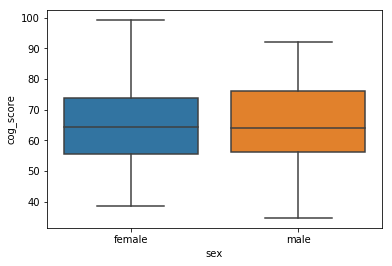

In [5]:
sns.boxplot(x='sex',y='cog_score',data=df)

We could also get a bit more sophisicated. Suppose we wanted to also account for which group a person is in:

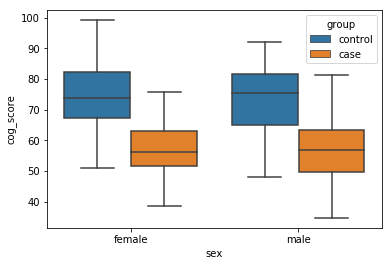

In [6]:
sns.boxplot(x='sex',y='cog_score',data=df,hue='group')

As you can see there is no sex effect on cognitive performance, but there is a pretty clear group effect! Notice how <code>seaborn</code> creates legends for you!

Now boxplots are nice but they hide a lot of the detail that might be useful for us in terms of understanding the distribution of the data. We can use <code>sns.boxenplot</code> to get an idea of the quantiles of the data or <code>sns.violinplot</code> to view a smoothed distribution of the data:

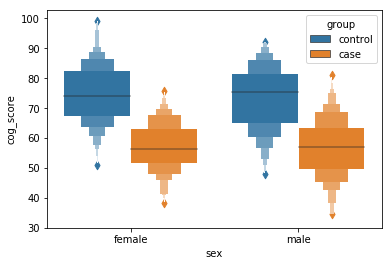

In [7]:
sns.boxenplot(x='sex',y='cog_score',data=df,hue='group')

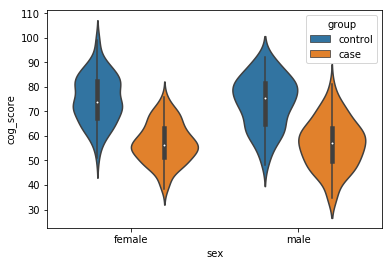

In [8]:
sns.violinplot(x='sex',y='cog_score',data=df,hue='group')

Now let's look into some more sophisticated factors. What about the effect of brain measurements?

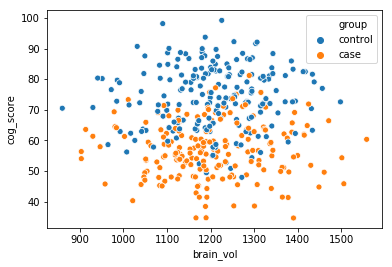

In [9]:
sns.scatterplot(x='brain_vol',y='cog_score',data=df,hue='group')

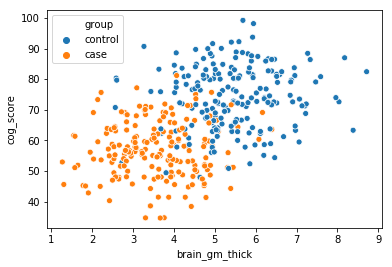

In [10]:
sns.scatterplot(x='brain_gm_thick',y='cog_score',data=df,hue='group')

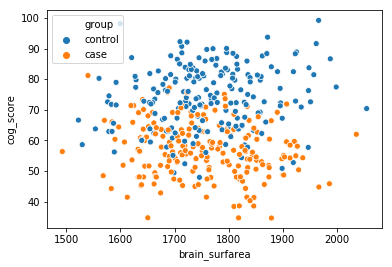

In [11]:
sns.scatterplot(x='brain_surfarea',y='cog_score',data=df,hue='group')

Looks like brain surface area and brain grey matter thickness do not clearly relate to cognitve scoring. Interestingly *brain grey matter thickness* seems to be a decent indicator!

We could just try plotting every variable one by one and looking for relationships between the data and this could take *forever* if there are a ton of variables. Hypothesis-driven exploration is important for this reason: we can narrow our variables of interest down significantly to a manageable level!

With our case we don't have too many variables, so its possible to simply just plot every variable against each other:

This is achieved by using <code>sns.pairplot</code> which plots every variable against each other:

ValueError: array must not contain infs or NaNs

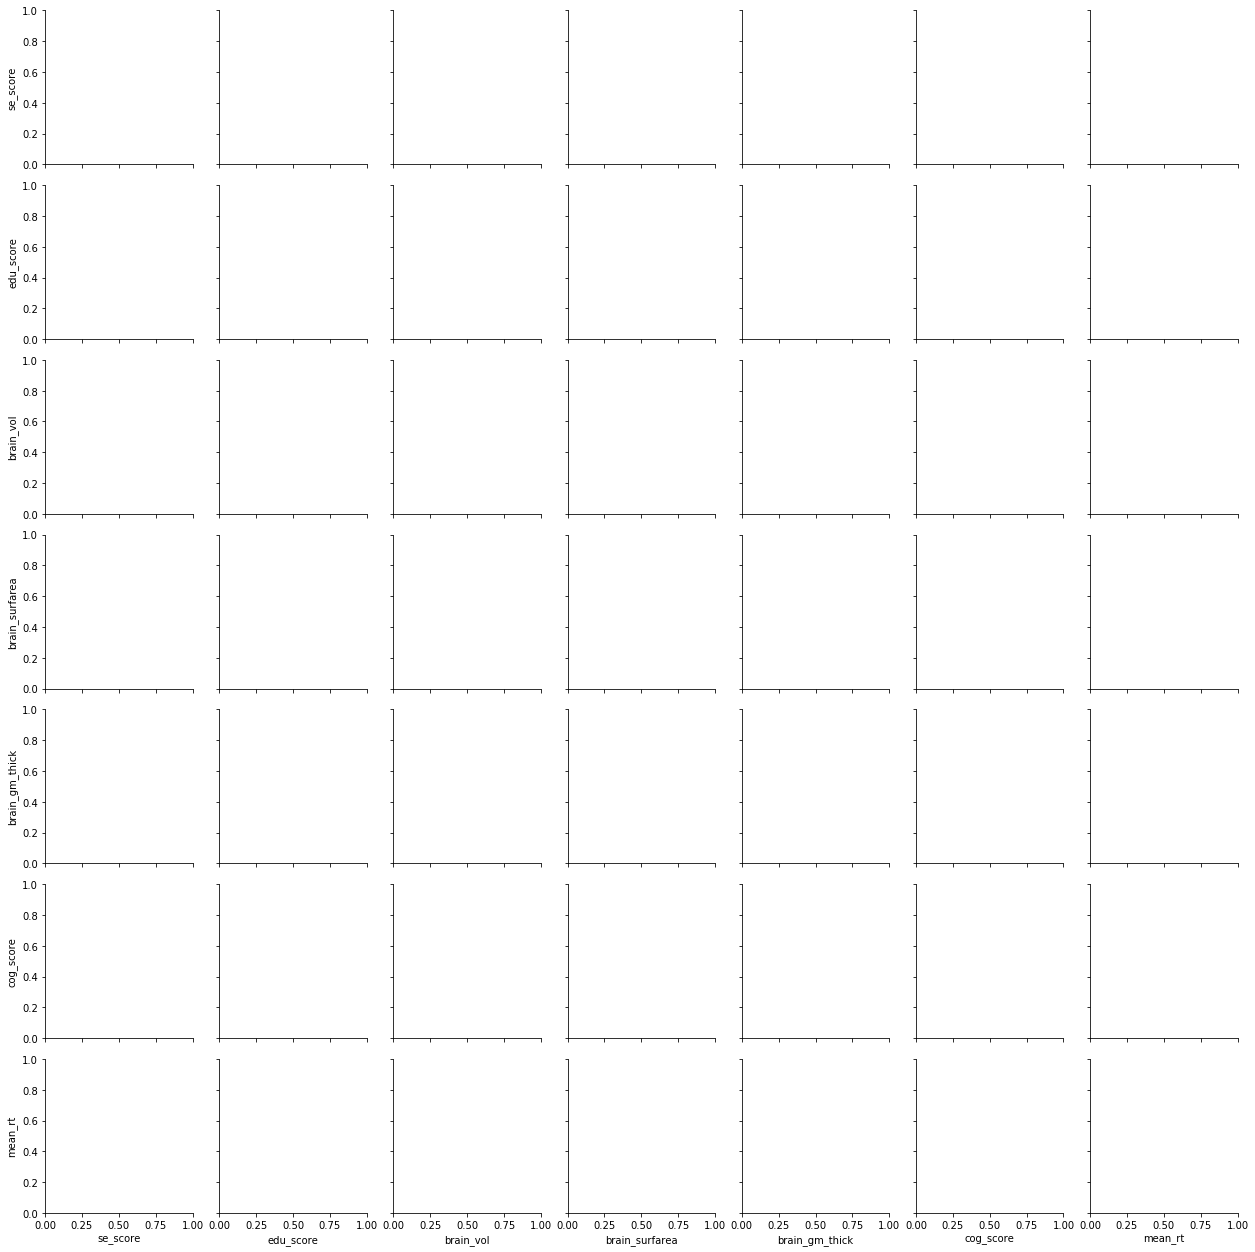

In [12]:
sns.pairplot(data=df,hue='group')

And we get an error. This error says that our DataFrame cannot contain any values called "infs" or "NaNs". We definitely know that our data contains "NaNs" because we put them there. But using NaNs actually works to our advantage because pandas contains utilities to deal with "NaNs" specifically;

In [13]:
df = df.dropna(axis=0)

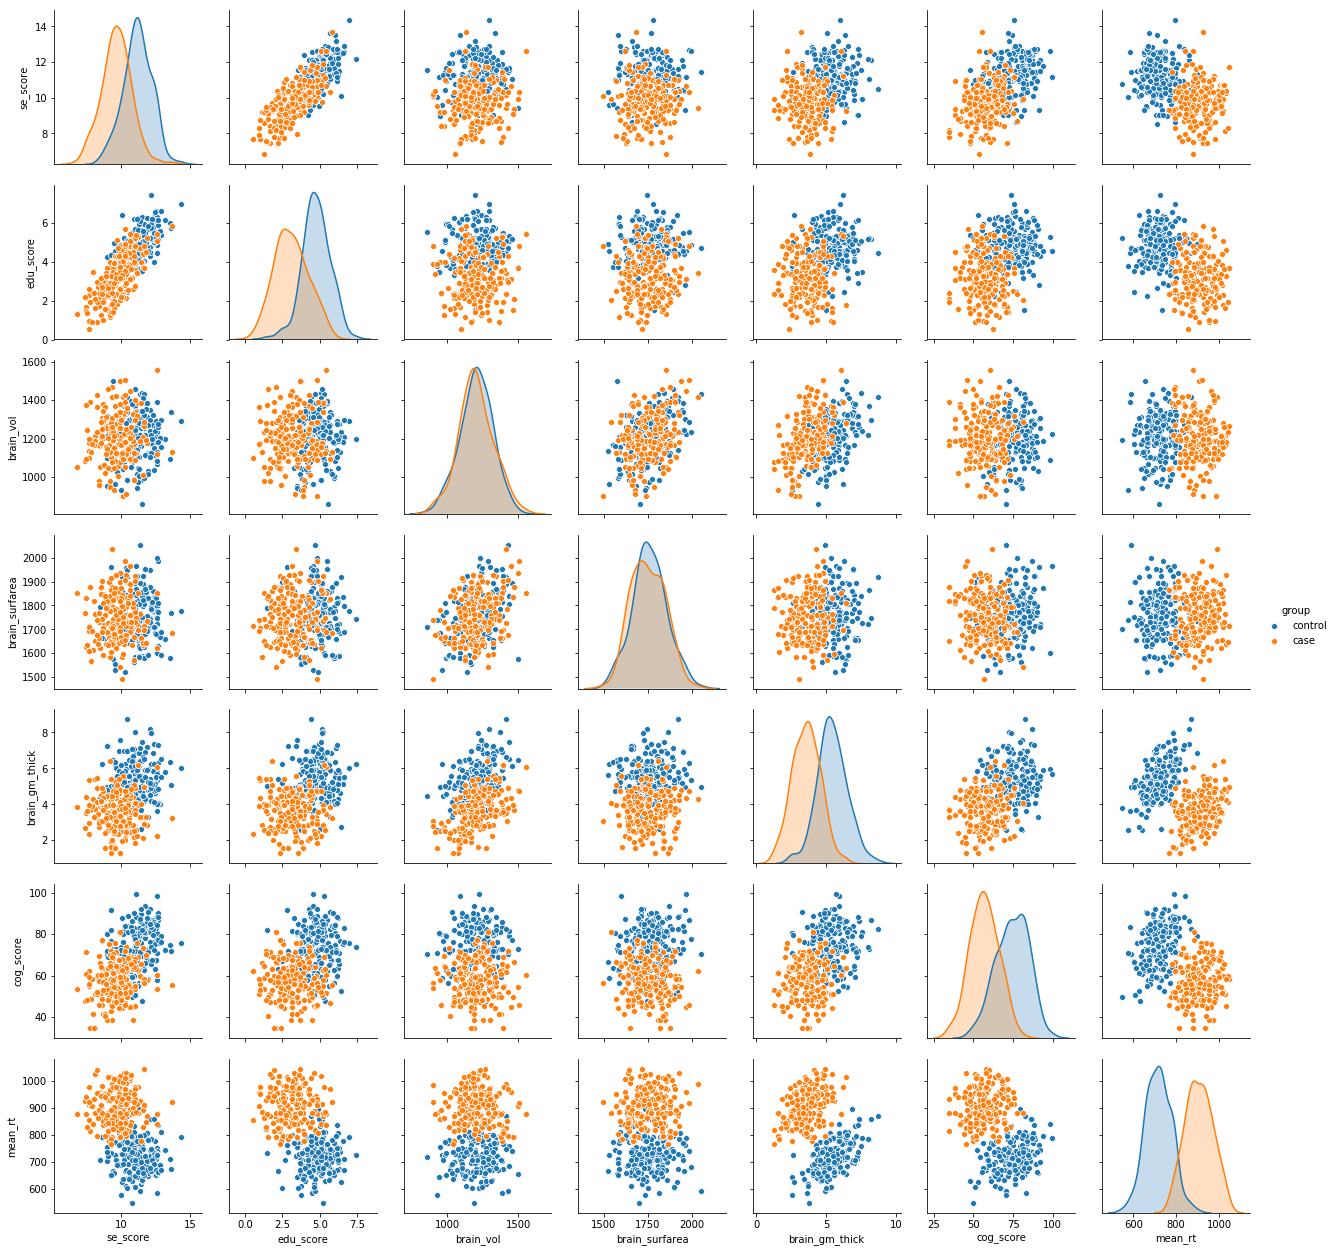

In [14]:
sns.pairplot(data=df,hue='group')

Looking at the cognitive score row it is pretty apparent that there seems to be an interaction between cognitive score, group, and some of the measured variables. We can perform the same visualization for sex as well:

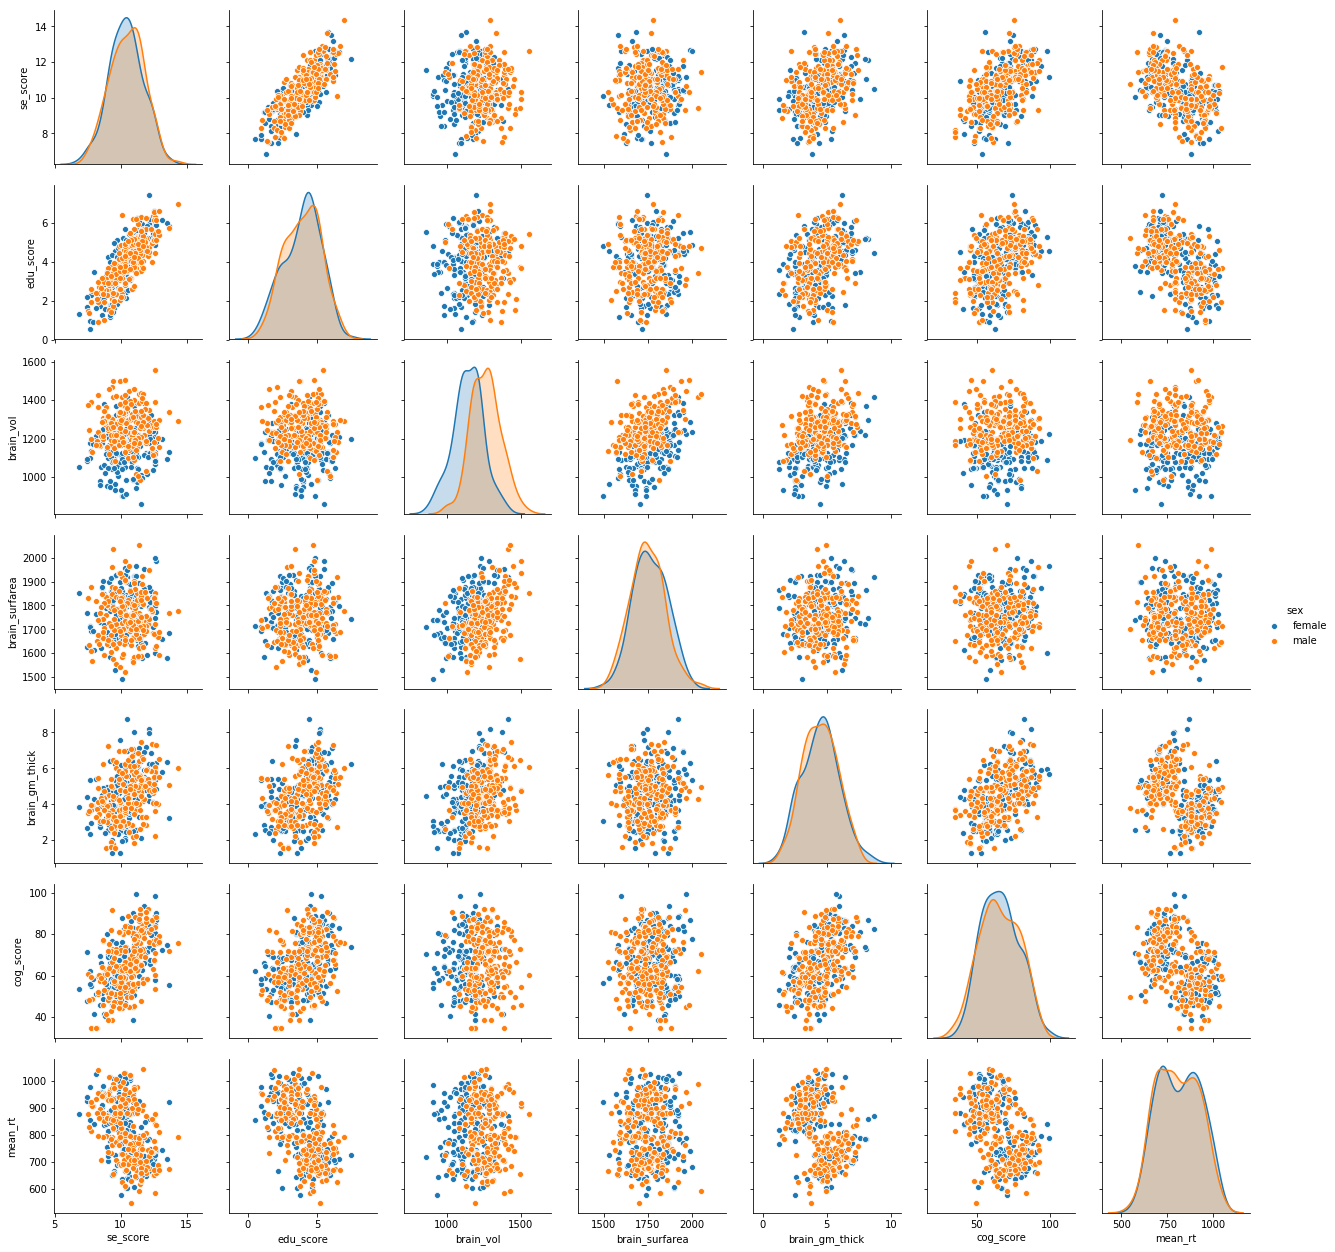

In [15]:
sns.pairplot(data=df,hue='sex')

The separation is less clear here, we do see slight differences in brain volume but not much else. What about if we wanted to separate out by:

- male control
- female control
- male case
- female case

Turns out that this is slightly complicated. Seaborn can only use one column to specify as a "grouping" variable. Therefore, in order to combine these groups we need to merge these 2 columns (2 distinctions each) into a single column. One way to do this is to simply concatenate the strings for each column together:

In [16]:
df.loc[:,'group_sex'] = df.loc[:,'group'].copy() + ',' + df.loc[:,'sex'].copy()

/home/jerry/.pyenv/versions/3.6.0/envs/scwg_python/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jerry/.pyenv/versions/3.6.0/envs/scwg_python/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


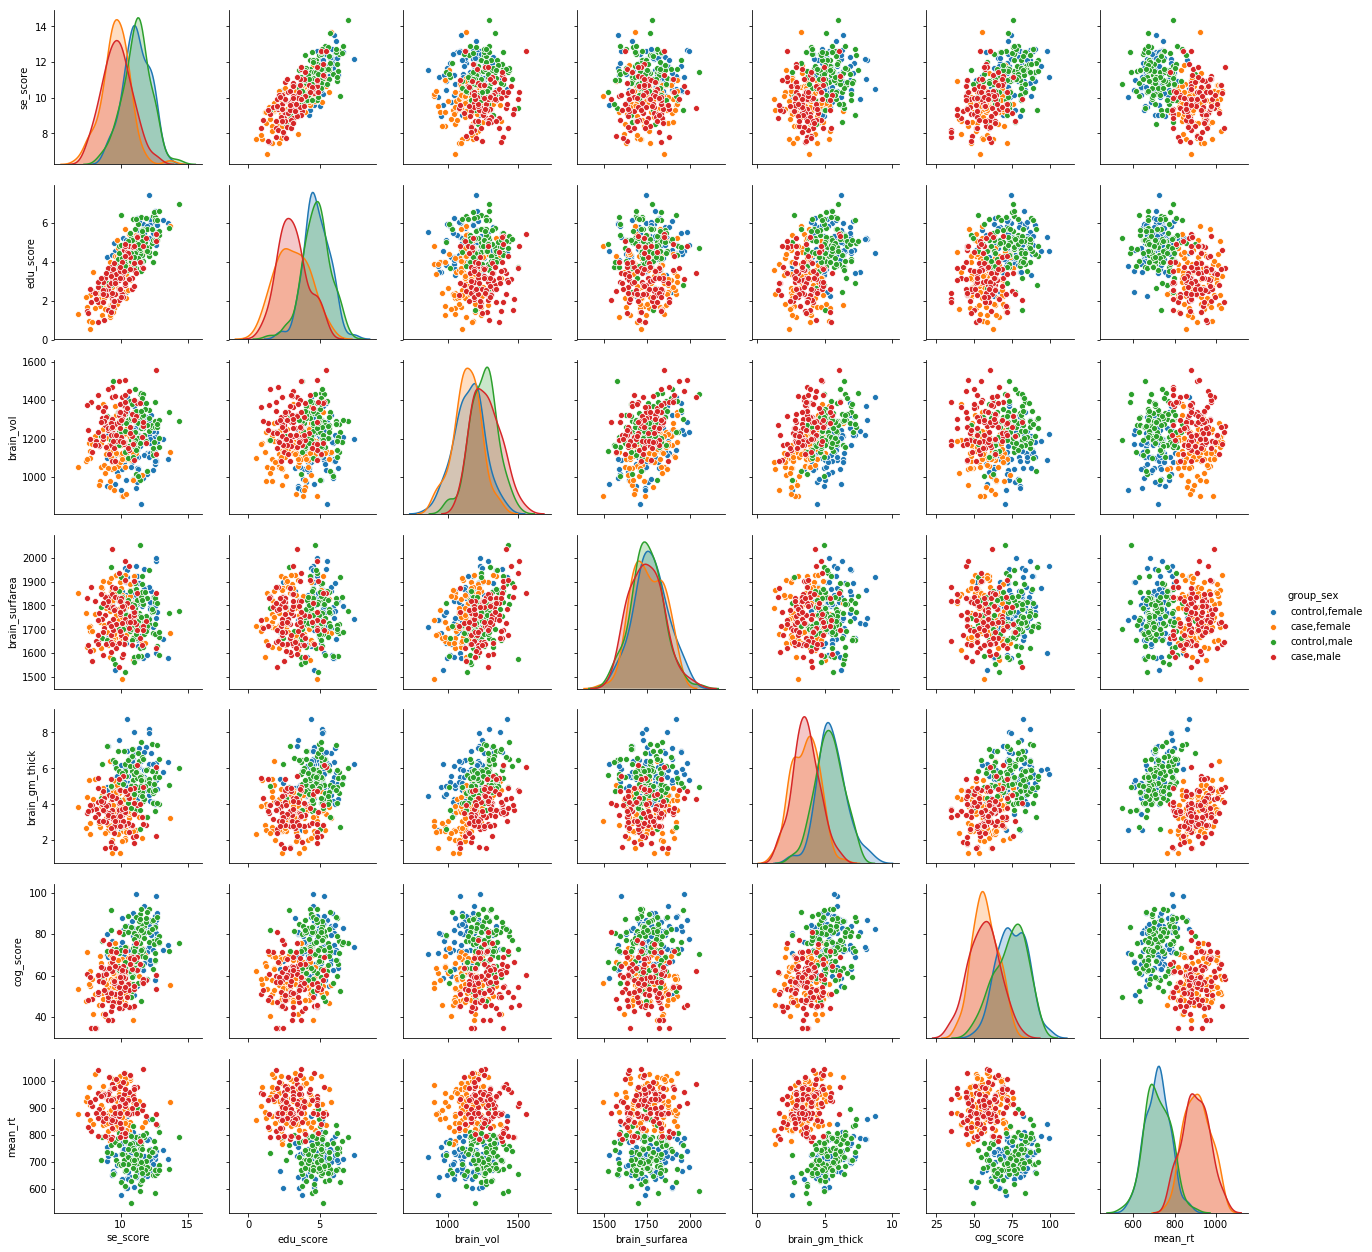

In [17]:
sns.pairplot(data=df,hue='group_sex')

Looks like a large degree of separation exists against case and control and the only axis in which male and female differ is in brain volumes. This makes sense with our intuition, we expect that males and females will perform equally on the cognitive task and it is true that male and female brain volumes differ slightly. Furthermore the only mean shift in cognitive performance seems to be related to whether an individual is a case or control. 

Furthermore, it indicates that if we want to standardize data, we'll need to account for the fact that we have different means between our groups. It's entirely possible that additional sub-groups exist but the current description of our data using group and sexes seems to account for all mean shifts in our data enough to be useful. 

For the final analysis phase, we'll explore how correlations matrices can be computed from the data in order to examine not only group mean shifts in measurements but how variables may relate to each-other

***

## Computing Correlations

The examples above explore the general group-wise **covariance structure** of the data. In other words, how do variables change with respect to other each other. If we wanted to assess the strength of this relationship statistically then we might want to compute correlations between each element of the data to generate a full correlation matrix. 

Calculating a correlation matrix is incredibly simple once the data is in the correct format. We first need to standardize our data so that our correlations between variables of interest make sense. To do this we'll first standardize our data group-wise and with the assumption of equal variance and no sex interaction effect, we can compute differences in correlation between control and case participants. 

The first step is to compute within-class Z-scores so that all data is centered around 0 and has unit variance. This is done by looping over each class, then updating the dataframe with Z-scored values:

In [18]:
#First get numeric columns that we'd like to work with
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [19]:
#Define a Z-score function
def z_score(x):
    return (x - x.mean())/x.std()

In [20]:
z_df = df.copy()
for g in df['group_sex'].unique():
    
    g_mask = df['group_sex'] == g
    z_df.loc[g_mask,numeric_cols] = z_df.loc[g_mask,numeric_cols].apply(z_score)

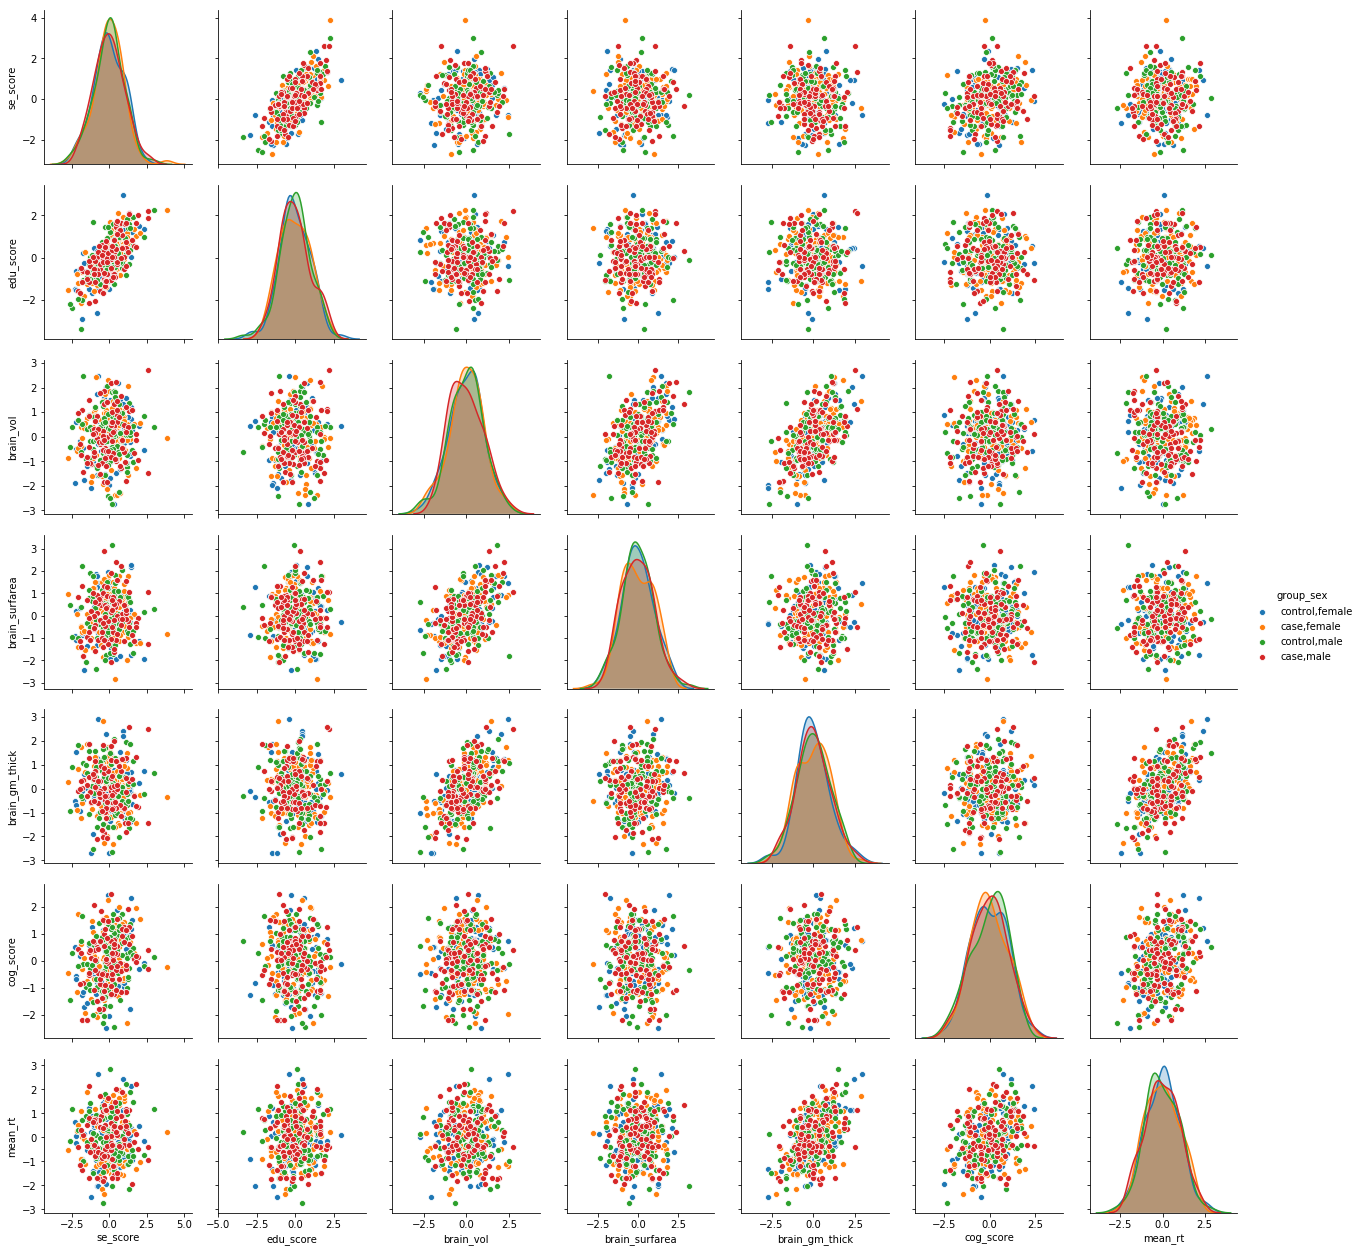

In [21]:
#Visualize data again to make sure transform worked
sns.pairplot(z_df,hue='group_sex')

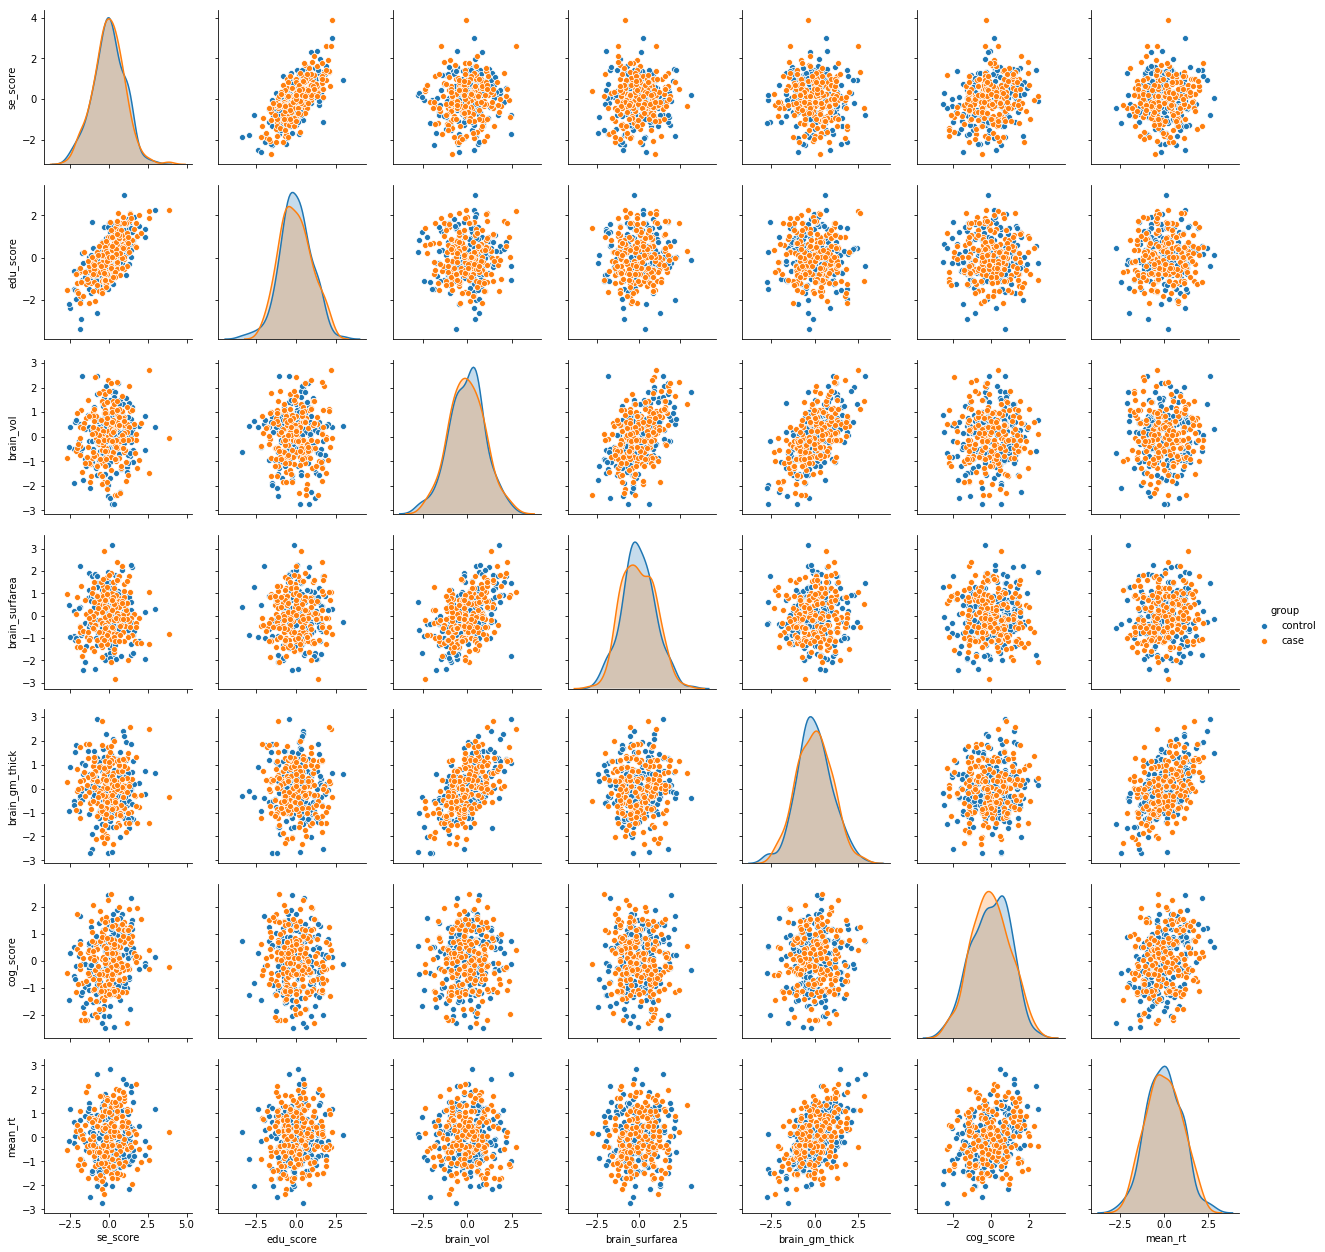

In [22]:
#Visualize again except by group
sns.pairplot(z_df,hue='group')

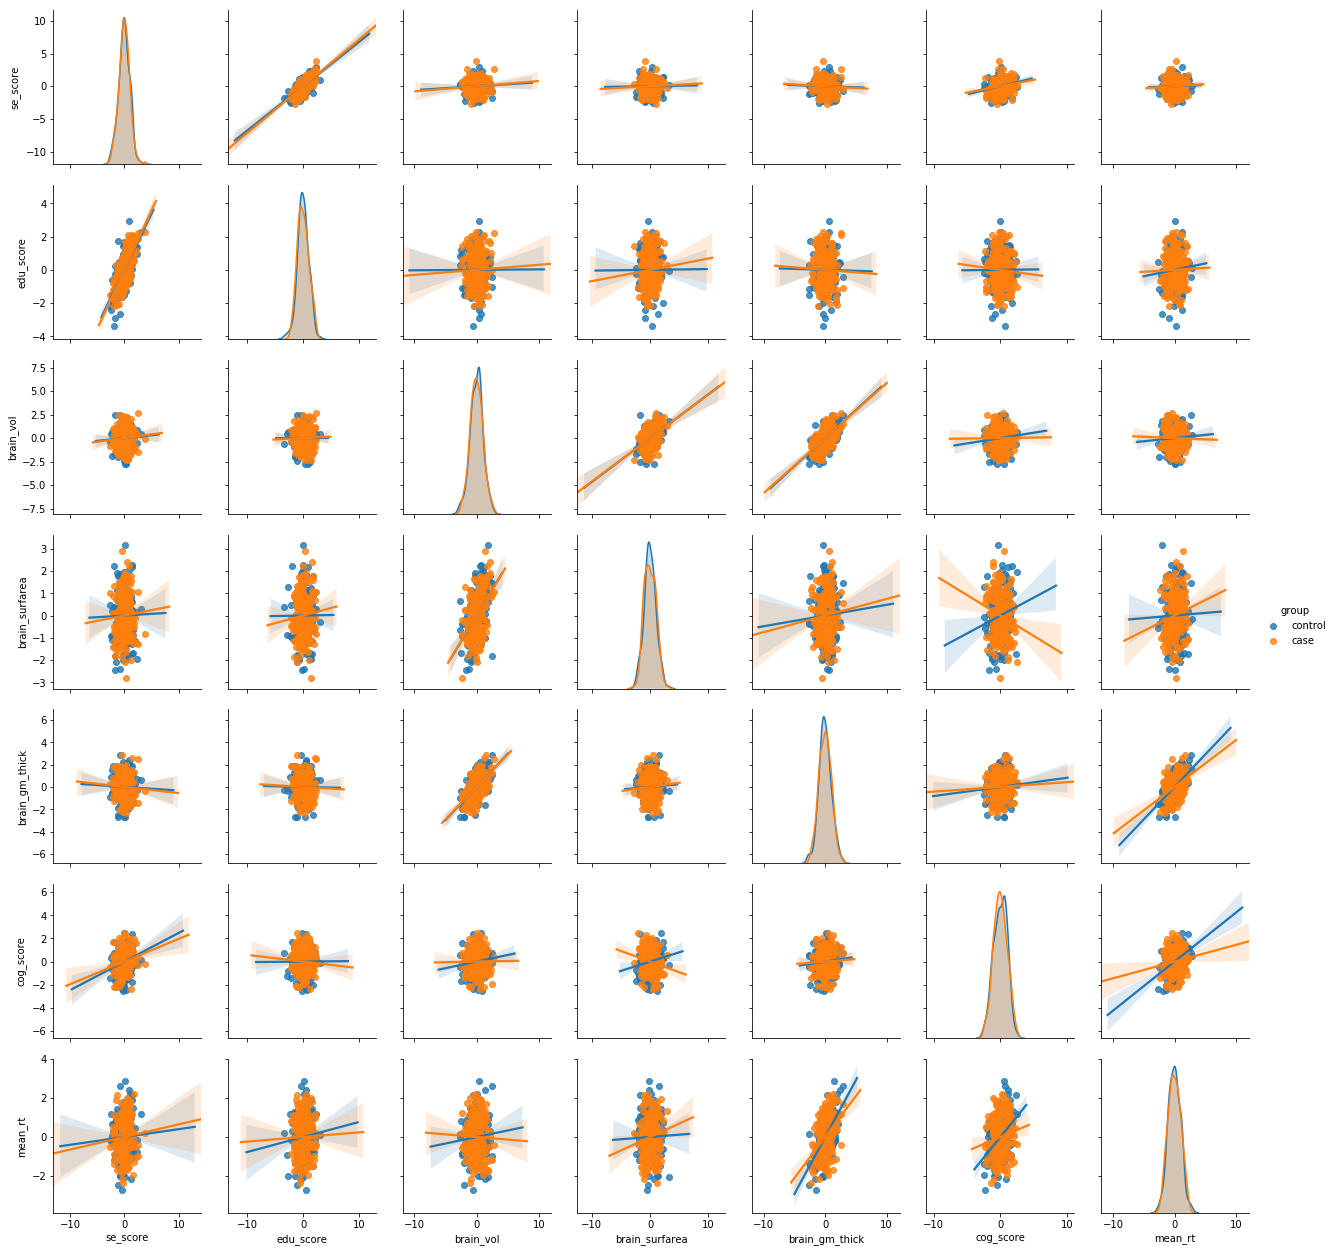

In [23]:
#View correlations
sns.pairplot(z_df,hue='group',kind='reg')

It is *almost always* recommended that when you compute statistical estimates such as correlation that you verify what you're calculating through visualization. If we just went ahead and computed a correlation matrix without first visualizing our data our correlation matrix would be spurious and useless for further analysis.

Computing a correlation matrix is incredibly easy and is done with <code>DataFrame.corr</code>. First we'll divide out a case and control dataframe:

In [24]:
case_zdf = z_df.loc[z_df['group'] == 'case',numeric_cols]
control_zdf = z_df.loc[z_df['group'] == 'control',numeric_cols]

In [25]:
case_corr =case_zdf.corr()
control_corr = control_zdf.corr()

In [26]:
case_corr

se_score  edu_score  brain_vol  brain_surfarea  \
se_score        1.000000   0.713546   0.079129        0.048105   
edu_score       0.713546   1.000000   0.030572        0.068115   
brain_vol       0.079129   0.030572   1.000000        0.462587   
brain_surfarea  0.048105   0.068115   0.462587        1.000000   
brain_gm_thick -0.055368  -0.030109   0.583600        0.074257   
cog_score       0.195961  -0.057419   0.010325       -0.183175   
mean_rt         0.064730   0.023608  -0.027104        0.137823   

                brain_gm_thick  cog_score   mean_rt  
se_score             -0.055368   0.195961  0.064730  
edu_score            -0.030109  -0.057419  0.023608  
brain_vol             0.583600   0.010325 -0.027104  
brain_surfarea        0.074257  -0.183175  0.137823  
brain_gm_thick        1.000000   0.042579  0.419858  
cog_score             0.042579   1.000000  0.144435  
mean_rt               0.419858   0.144435  1.000000

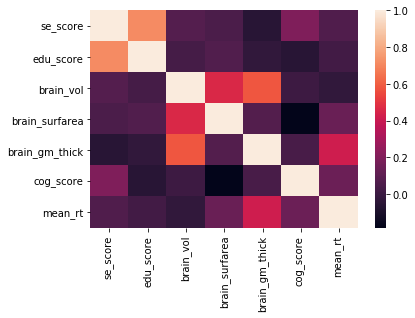

In [27]:
sns.heatmap(case_corr)

In [28]:
control_corr

se_score  edu_score  brain_vol  brain_surfarea  \
se_score        1.000000   0.678072   0.060174        0.015176   
edu_score       0.678072   1.000000   0.002723        0.004659   
brain_vol       0.060174   0.002723   1.000000        0.466744   
brain_surfarea  0.015176   0.004659   0.466744        1.000000   
brain_gm_thick -0.032785  -0.011597   0.596200        0.047969   
cog_score       0.247497   0.004507   0.114164        0.160668   
mean_rt         0.040142   0.076943   0.067167        0.023510   

                brain_gm_thick  cog_score   mean_rt  
se_score             -0.032785   0.247497  0.040142  
edu_score            -0.011597   0.004507  0.076943  
brain_vol             0.596200   0.114164  0.067167  
brain_surfarea        0.047969   0.160668  0.023510  
brain_gm_thick        1.000000   0.081851  0.580989  
cog_score             0.081851   1.000000  0.423480  
mean_rt               0.580989   0.423480  1.000000

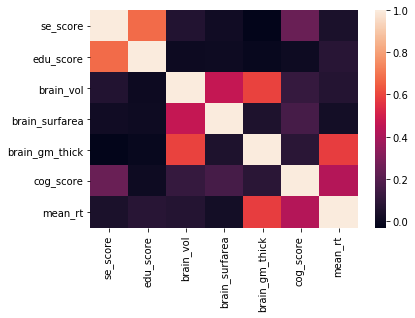

In [29]:
sns.heatmap(control_corr)